## Importing Packages

In [1]:
import prepare
import acquire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Acquire

In [2]:
df = acquire.complete_data(cached = True)
power = acquire.get_power_data(cached = True)

## Prepare

In [3]:
df = prepare.prepare_items(df)
power = prepare.prep_power(power)

## Split

In [35]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

## Explore

In [40]:
train

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,11,11.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,5,NaN,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,11,11.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,11,11.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 00:00:00+00:00,49,46.0,877759,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,8,NaN,Easy-off,Easy-off Oven Cleaner Lemon Scent,9.54,62338879772,62338879772,7,Saturday,438.84
2016-07-02 00:00:00+00:00,16,39.0,278831,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,15,15.0,Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,5.17,792850014008,792850014008,7,Saturday,201.63
2016-07-02 00:00:00+00:00,42,58.0,749939,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,NaN,Moms Best Naturals,Moms Best Naturals Cereal Toasted Cinnamon Squ...,2.97,883978129115,883978129115,7,Saturday,172.26


In [38]:
money = pd.DataFrame(train.groupby('sale_date').sales_total.sum())
money = money.resample('W').sum()

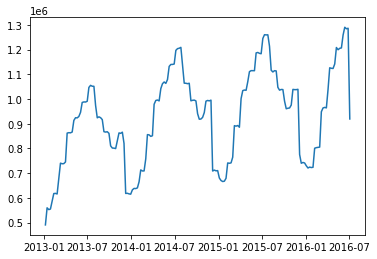

In [39]:
plt.plot(money.index, money.sales_total)

In [42]:
moneyday = pd.DataFrame(train.groupby('day_of_week').sales_total.mean())
moneyday

,sales_total
day_of_week,
Friday,281.056613
Monday,210.685340
Saturday,298.254284
Sunday,316.161735
Thursday,262.997190
Tuesday,245.186367
Wednesday,245.600530


<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

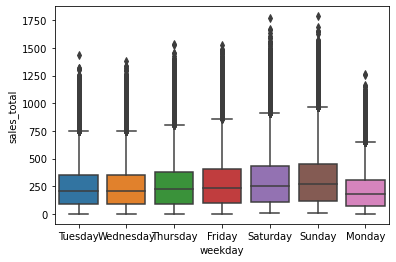

In [54]:
y = train.sales_total
(
    y.reset_index()
    .assign(weekday=lambda df: df.sale_date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='sales_total', x='weekday')
)

In [47]:
moneymonth = pd.DataFrame(train.groupby('sale_date').sales_total.sum())
moneymonth = money.resample('M').mean()
moneymonth['sales_total'] = round(moneymonth, 0)

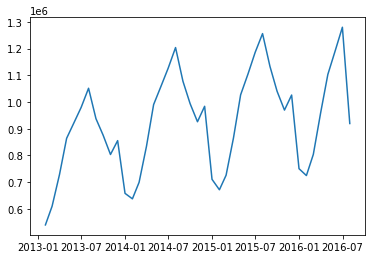

In [49]:
plt.plot(moneymonth.index, moneymonth.sales_total)

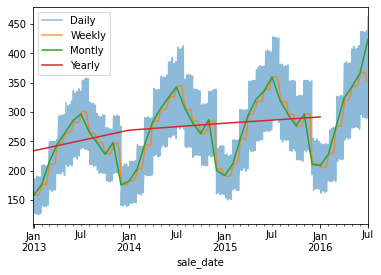

In [56]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week daily sales'}, xlabel='sale_date'>

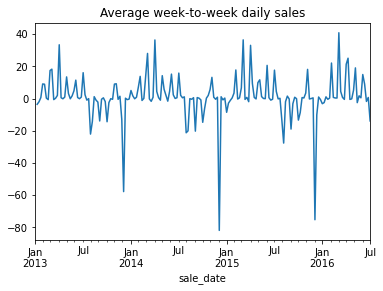

In [57]:
y.resample('W').mean().diff().plot(title='Average week-to-week daily sales')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

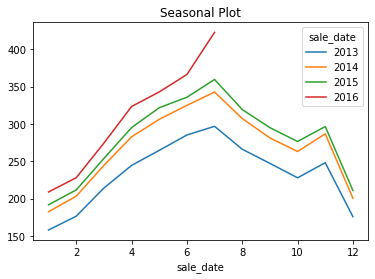

In [58]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')